In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook
%matplotlib inline

#Read files:
data = pd.read_csv("Train_Loan_Home.csv")

In [49]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Month,CoapplicantIncome_Month,LoanAmount_K,Loan_Amount_Term_M,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
# Lets check for the missing values
data.apply(lambda x: sum(x.isnull()))

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome_Month       0
CoapplicantIncome_Month     0
LoanAmount_K               22
Loan_Amount_Term_M         14
Credit_History             50
Property_Area               0
Loan_Status                 0
dtype: int64

In [51]:
# Fill the loan amount
#data['LoanAmount_K'].fillna(data['LoanAmount_K'].mean(), inplace=True)

In [52]:
# Lets check for the missing values
data.apply(lambda x: sum(x.isnull()))

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome_Month       0
CoapplicantIncome_Month     0
LoanAmount_K               22
Loan_Amount_Term_M         14
Credit_History             50
Property_Area               0
Loan_Status                 0
dtype: int64

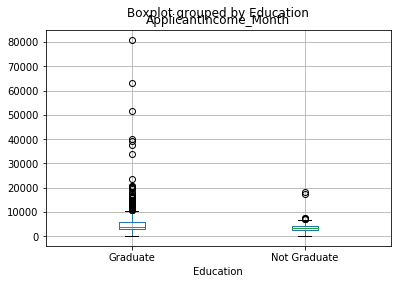

In [53]:
data.boxplot(column='ApplicantIncome_Month', by = 'Education')

In [54]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [55]:
data['Self_Employed'].fillna('No',inplace=True)

In [56]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

### NOTE : This method will work only if you have not filled the missing values in Loan_Amount variable using the previous approach, i.e. using mean. 

In [57]:
table = data.pivot_table(values='LoanAmount_K', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
#data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)
data['LoanAmount_K'].fillna(data[data['LoanAmount_K'].isnull()].apply(fage, axis=1), inplace=True)


In [64]:
# Lets check for the missing values
data.apply(lambda x: sum(x.isnull()))

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed               0
ApplicantIncome_Month       0
CoapplicantIncome_Month     0
LoanAmount_K                0
Loan_Amount_Term_M         14
Credit_History             50
Property_Area               0
Loan_Status                 0
LoanAmount_log              0
TotalIncome                 0
TotalIncome_log             0
dtype: int64

In [58]:
# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

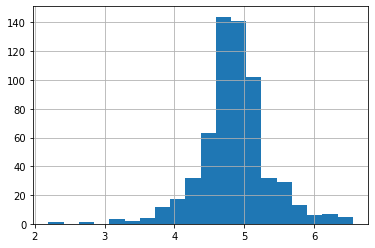

In [59]:
data['LoanAmount_log'] = np.log(data['LoanAmount_K'])
data['LoanAmount_log'].hist(bins=20)

In [60]:
#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [61]:
# Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. 
# So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

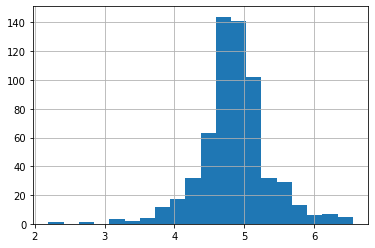

In [62]:
data['TotalIncome'] = data['ApplicantIncome_Month'] + data['CoapplicantIncome_Month']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['LoanAmount_log'].hist(bins=20) 

In [63]:
# Now we see that the distribution is much better than before. 
# I will leave it up to you to impute the missing values for Gender, Married, Dependents, Loan_Amount_Term, Credit_History. 
# Also, I encourage you to think about possible additional information which can be derived from the data. 
# For example, creating a column for LoanAmount/TotalIncome might make sense as it gives an idea of how well 
#the applicant is suited to pay back his loan
